In [21]:
# Cell 1: Load and examine the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Credit Card Fraud Detection dataset
df = pd.read_csv('creditcard.csv')

# Show the shape and first few rows
print("Dataset shape:")
print(df.shape)
print("\nFirst few rows:")
print(df.head())

# Check class distribution
print("\nClass distribution (proportions):")
print(df['Class'].value_counts(normalize=True))

Dataset shape:
(284807, 31)

First few rows:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -

In [18]:
# Cell 2: Data preparation: splitting and standardization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target
# Since features V1 to V28 are PCA-transformed, and 'Amount' is not scaled, we'll standardize both.
features = df.drop(columns=['Class'])
target = df['Class']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the shapes after splitting
print("Train features shape:", X_train_scaled.shape)
print("Test features shape:", X_test_scaled.shape)

Train features shape: (227845, 30)
Test features shape: (56962, 30)


In [19]:
# Cell 3: Logistic Regression from scratch
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.1, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        # Sigmoid activation using vectorized operations
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.n_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        # Convert probabilities to binary class output
        return [1 if i > 0.5 else 0 for i in y_predicted]

# Train the model
model = LogisticRegressionScratch(learning_rate=0.1, n_iterations=1000)
model.fit(X_train_scaled, y_train.values)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate performance
print("Logistic Regression from Scratch Results:")
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression from Scratch Results:

Accuracy: 0.9990695551420246

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.59      0.69        98

    accuracy                           1.00     56962
   macro avg       0.91      0.80      0.84     56962
weighted avg       1.00      1.00      1.00     56962



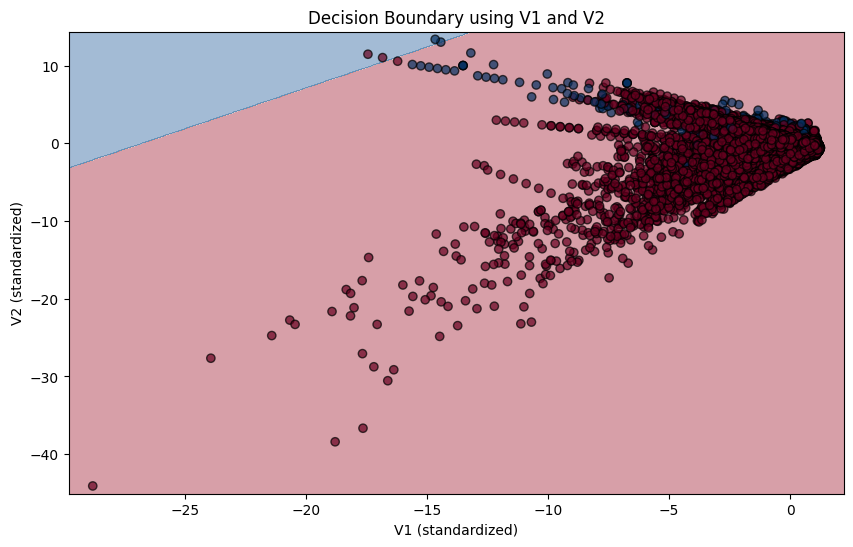

In [20]:
# Cell 4: (Optional) Visualize a feature pair decision boundary
# Note: With >29 features, it's common to choose two features to visualize. Here, we pick 'V1' and 'V2'.
# Create copies of the data with only V1 and V2 for visualization purposes.
X_vis = df[['V1', 'V2']].values
y_vis = df['Class'].values

# Split and scale these two features
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_vis, test_size=0.2, random_state=42, stratify=y_vis)
scaler_vis = StandardScaler()
X_train_vis_scaled = scaler_vis.fit_transform(X_train_vis)
X_test_vis_scaled = scaler_vis.transform(X_test_vis)

# Train a logistic regression model for visualization using our scratch implementation
model_vis = LogisticRegressionScratch(learning_rate=0.1, n_iterations=1000)
model_vis.fit(X_train_vis_scaled, y_train_vis)

# Prepare grid for decision boundary plot
x_min, x_max = X_train_vis_scaled[:, 0].min() - 1, X_train_vis_scaled[:, 0].max() + 1
y_min, y_max = X_train_vis_scaled[:, 1].min() - 1, X_train_vis_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))
Z = model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.array(Z).reshape(xx.shape)

plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='RdBu')
plt.scatter(X_train_vis_scaled[:,0], X_train_vis_scaled[:,1], c=y_train_vis, edgecolors='k', cmap='RdBu', alpha=0.7)
plt.xlabel('V1 (standardized)')
plt.ylabel('V2 (standardized)')
plt.title('Decision Boundary using V1 and V2')
plt.show()